Instituto Federal de Santa Catarina  
Curso de Engenharia Eletrônica  
Disciplina: Sistemas de Controle II  
Estudante: Enzzo Comassetto dos Santos 
Setembro de 2023

## Projeto 1 - Controle Digital

$ tp = 22,60\,ms$  
$ \delta_1 = 112\,mV$  
$ \delta_2 = 500\,mV $

In [116]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
from scipy import signal
import control as ctrl
#from control.matlab import step
from control import matlab
from IPython.display import display, Markdown, Latex, Image


tp = 22.6e-3
delta_1 = 112e-3
delta_2 = 500e-3

### $\rightarrow$ $M_p$ - Sobressinal da planta

### $M_p = \frac{\Delta_1 }{ \Delta_2}$

In [117]:
Mp = delta_1/delta_2
print(f'Mp = {Mp:.5f}, '" = ",Mp*100, "%")

Mp = 0.22400,  =  22.400000000000002 %


### $\rightarrow$ $\zeta $ - Fator de amortecimento original

### $\zeta = \sqrt{\frac{log(M_p)^2}{\pi^2 + log(M_p^2)}}$

In [118]:
zeta = np.sqrt((math.pow(np.log(Mp),2))/(math.pow(np.pi,2)+math.pow(np.log(Mp),2)))
print(f'\nZeta =  {zeta:.5f}')


Zeta =  0.42996


### $\rightarrow$ $Wn$ - Frequência natural original

### $W_n = \frac{\pi}{t_p*\sqrt{1-\zeta^2}}$

In [119]:
Wn = np.pi/(tp*np.sqrt(1-math.pow(zeta,2)))
print(f'\nWn = {Wn:.4f}')


Wn = 153.9667


### $\rightarrow$ $T_s$ - Tempo de acomodação
### $T_s = \frac{3}{\zeta*W_n}$

In [120]:
Ts_5 = 3/ (zeta*Wn)
Ts_5 = Ts_5 * 1000
print(f'Ts 5% = {Ts_5:.4f} ms')

Ts 5% = 45.3175 ms


### $\rightarrow$ Resposta ao degrau do sistema contínuo

In [121]:
num = [pow(Wn,2)]
den = [1, 2*zeta*Wn, pow(Wn,2)]
Gs = ctrl.tf(num,den);
print("G(s) =") 
Gs

G(s) =


TransferFunction(array([23705.74677066]), array([1.00000000e+00, 1.32399047e+02, 2.37057468e+04]))

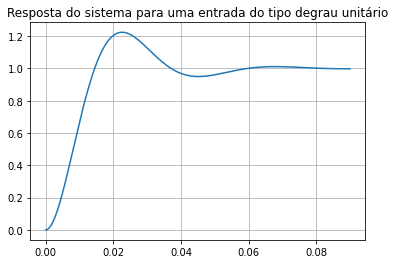

In [122]:
tfinal = 90e-3;
t = np.linspace(0, tfinal, 5000);
yout = ctrl.step_response(Gs, t)[1];
plt.plot(t, yout);
plt.title("Resposta do sistema para uma entrada do tipo degrau unitário");
plt.grid();

## $\rightarrow$  Projeto do controlador digital

In [152]:
ts = len("EnzzoComassettoDosSantos")*10**-3
print("Ts 5% = ", ts, "s")

MP_2 = 2 * len("Enzzo")/100
print("MP = ", MP_2*100, "%")

Ts 5% =  0.024 s
MP =  10.0 %


### $\rightarrow$  Fator de Amortecimento

### $\zeta \geq \sqrt{\frac{log(M_p)^2}{\pi^2 + log(M_p^2)}}$

In [124]:
zeta2 = np.sqrt((math.pow(np.log(MP_2),2))/(math.pow(np.pi,2)+math.pow(np.log(MP_2),2)))
print(f'\nZeta =  {zeta2:.5f}')


Zeta =  0.59116


$ \zeta \geq 0,59116 $

In [125]:
zeta2 = 0.7

### $\rightarrow$  Sobressinal

 $ M_p = e^\frac{-\pi . \zeta}{\sqrt{1-\zeta^2}}$

In [126]:
Mp_3 = np.exp((-np.pi*zeta2)/(np.sqrt(1-zeta2**2)))
print(f'\nMp =  {Mp_3:.5f}')


Mp =  0.04599


 $ M_p = 4,599 \%$

### $\rightarrow$  Frequência Natural

### $ \omega_n \geq \frac{3}{t_s5\%*\zeta}$

In [127]:
wn2 = 3/(ts*zeta2)
print(f'\nWn = {wn2:.4f} rad/s')


Wn = 178.5714 rad/s


### $ \omega_n \geq 178,5714 \frac{rad}{s}$

In [153]:
wn2 = 100*np.pi
print(wn2)

314.1592653589793


### $\rightarrow$  Tempo de Acomodação de 5%

In [129]:
ts5 = 3/(zeta2*wn2)
print(f'\nTs5% = {ts5:.7f} s')


Ts5% = 0.0136419 s


$t_{s5\%} = 13,64 ms$

### $\rightarrow$  Período de Amostragem

$ \omega_d =\omega_n \sqrt{1 - \zeta^2} $

In [130]:
wd = wn2*np.sqrt(1-zeta2**2)
print(f'\nWd = {wd:.4f} *pi rad/s')


Wd = 224.3546 *pi rad/s


$ \omega_d = 224,3546 \pi rad/s$

$ \omega_a = \omega_d * 10$

In [131]:
wa = wd * 10
print(f'\nWa = {wa:.4f} *pi rad/s')


Wa = 2243.5459 *pi rad/s


$ \omega_a = 2243,5459 \pi rad/s$

$ T_a = \frac{2.\pi}{\omega_a} $

In [132]:
Ta = 2*np.pi/wa
print(f'\nTa = {Ta:.4f} s')


Ta = 0.0028 s


$ T_a = 2,8 ms$

In [133]:
Gz = ctrl.c2d(Gs, Ta)
Gz

TransferFunction(array([0.08122679, 0.07173686]), array([ 1.        , -1.53722418,  0.69018783]), 0.0028005601680560197)

### $\rightarrow$  Módulo e Ângulo

In [134]:
Z_mod = np.exp(-Ta*zeta2*wn2)
Z_fase_rad = Ta*wn2*np.sqrt(1-zeta2**2)
Z_fase_deg = math.degrees(Z_fase_rad)

z1 = cmath.rect(Z_mod, Z_fase_rad)

print(f'z1 = |{Z_mod:.6f}|<{Z_fase_deg:.6f}°')
print('z1 =',z1)

z1 = |0.540168|<36.000000°
z1 = (0.4370049734786017+0.31750269818205895j)


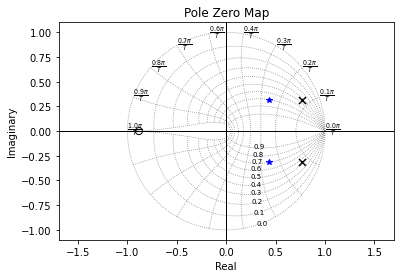

In [135]:
ctrl.pzmap(Gz, True, True)

plt.plot(z1.real, z1.imag, '*b')
plt.plot(z1.real, -z1.imag, '*b')
plt.show()

### $\rightarrow$  Cálculo da condição de ângulo

In [136]:
# Integrador
Ci = ctrl.tf(1,[1, -1], Ta) 

# Zeros
Cz = ctrl.tf(Gz.den[0][0], 1, Ta)

Gc = Cz * Ci 

ang = np.pi - cmath.phase(Gc(z1)) - cmath.phase(Gz(z1))

print(f'Ângulo resultante: {math.degrees(ang):.4f}°')

Ângulo resultante: -42.9438°


### $\rightarrow$  Cálculo de $\beta$

In [137]:
beta = (z1.imag - z1.real * math.tan(-ang))/math.tan(-ang)
print(f'Beta = {beta:.6f}')

Beta = -0.095855


In [138]:
Cp = ctrl.tf([1], [1, beta], Ta)

#print(f'Gc = {Cp*Cz}')

FTMA_aux = Cp*Gc*Gz
#print(FTMA_aux)
math.degrees(cmath.phase(FTMA_aux(z1)))

-179.99999999999997

### $\rightarrow$  Cálculo do K

In [139]:
K = 1/np.abs(FTMA_aux(z1))

FTMA = K * FTMA_aux
print(f'K = {K:.6f} ')

print('Módulo = ', np.abs(FTMA(z1)))

K = 2.731181 
Módulo =  1.0


In [155]:
Controlador = K*Cp*Gc

print(f'C = {Controlador}\nG = {Gz}')

C = 
2.731 z^2 - 4.198 z + 1.885
---------------------------
  z^2 - 1.096 z + 0.09585

dt = 0.0028005601680560197

G = 
 0.08123 z + 0.07174
----------------------
z^2 - 1.537 z + 0.6902

dt = 0.0028005601680560197



In [141]:
FTMFz = FTMA/(1 + FTMA)
FTMFz
yc, tc =matlab.step(FTMFz, Ta*np.arange(0,int(0.05/Ta + 1)))

In [142]:
print(z1)
ctrl.pole(ctrl.minreal(FTMFz))

(0.4370049734786017+0.31750269818205895j)
6 states have been removed from the model


array([0.43700497+0.3175027j, 0.43700497-0.3175027j])

### $\rightarrow$  Equações Recursivas

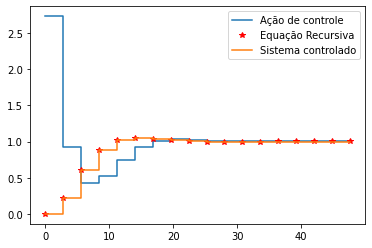

In [150]:
kmax = int(0.05/Ta + 1)
t = Ta*np.arange(0,kmax)
Ref = 1
y = np.zeros(kmax)
u = np.zeros(kmax)
e = Ref - y

u[0] = 2.731*e[0]
y[1] = 0.08123*u[0] +1.537*y[0] 
e[1] = Ref - y[1]
u[1] = 2.731*e[1] -4.198*e[0] +1.0962*u[0]

for k in range(2, kmax):
    y[k] = 1.537*y[k-1] - 0.6902*y[k-2] + 0.08123*u[k-1] + 0.07174*u[k-2]
    e[k] = Ref - y[k]
    u[k] = 1.0962*u[k-1] - 0.09585*u[k-2] + 2.731*e[k] - 4.198*e[k-1] + 1.885*e[k-2]

plt.plot(t*1e3, u, ds='steps-post', label="Ação de controle")
plt.plot(t*1e3, y, 'r*', label="Equação Recursiva")
plt.plot(tc*1e3, yc, ds='steps-post', label= "Sistema controlado")
plt.legend()
plt.show()

In [144]:
print(f'Mp = {(max(y)-1)*100:.2f}%')

Mp = 4.63%


In [145]:
print(f'Erro = {(y[-1]-1)*100:.2f}%')

Erro = 0.09%


In [146]:
np.argwhere(y>=.95)[0][0]*Ta

0.011202240672224079